In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ladefensebuilding.csv')
data.head()

,ladefense,Building,longitude,latitude,Location,Surface area(m²),Offices(m²),Shops(m²),height,function,Delivery,zone,node
0,NaN,Europe,48.891102,2.245964,"33, Place des Corolles - 92400 Courbevoie",30161,27691,2470,110,Office,2011,Place des Corolles,esplande nord
1,NaN,Aurore,48.890146,2.247346,"18, Place des Reflets - 92 400 Courbevoie",38 855,32779,1 595,100,Office,1970,Place des Reflets,esplande nord
2,NaN,Saint Gobain,48.889490,2.249256,La Défense / North Esplanade / Iris,48 948,NaN,NaN,165,Office,2020,Place de lIris,esplande nord
3,NaN,CB21,48.888875,2.249909,"Esplanade Nord, quartier Iris (Courbevoie)",78 000,NaN,NaN,188,Office,2021,Place de lIris,esplande nord
4,NaN,D2,48.890514,2.247880,17 bis Place des Reflets - 924,54530,49000,NaN,175,Office,2015,Place des Reflets,esplande nord


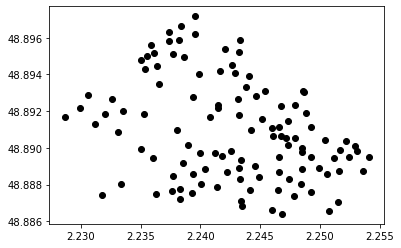

In [3]:
X = data[["longitude","latitude"]]
#Visualise data points
plt.scatter(X["latitude"],X["longitude"],c='black')
plt.show()

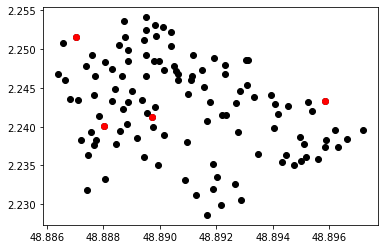

In [4]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=4

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["longitude"],X["latitude"],c='black')
plt.scatter(Centroids["longitude"],Centroids["latitude"],c='red')
plt.show()

In [5]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["longitude"]-row_d["longitude"])**2
            d2=(row_c["latitude"]-row_d["latitude"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["latitude","longitude"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['latitude'] - Centroids['latitude']).sum() + (Centroids_new['longitude'] - Centroids['longitude']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["latitude","longitude"]]

<ipython-input-5-68f659c27683>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-5-68f659c27683>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


-0.0005773516761706787
-0.0011832779233258428
-0.0006339738377563187
-0.00046653285471887074
-0.00011750242980745895
-0.00020837200084455887
-0.00022714051190497742
0.0


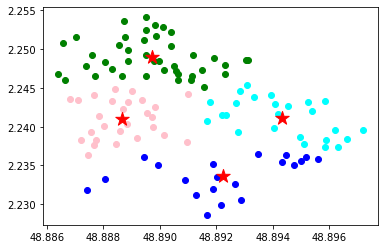

In [6]:
color=['blue','green','cyan','pink','yellow','purple']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["longitude"],data["latitude"],c=color[k])
plt.scatter(Centroids["longitude"],Centroids["latitude"],c='red',marker='*',s=200)
plt.show()